## 데이터셋 설명
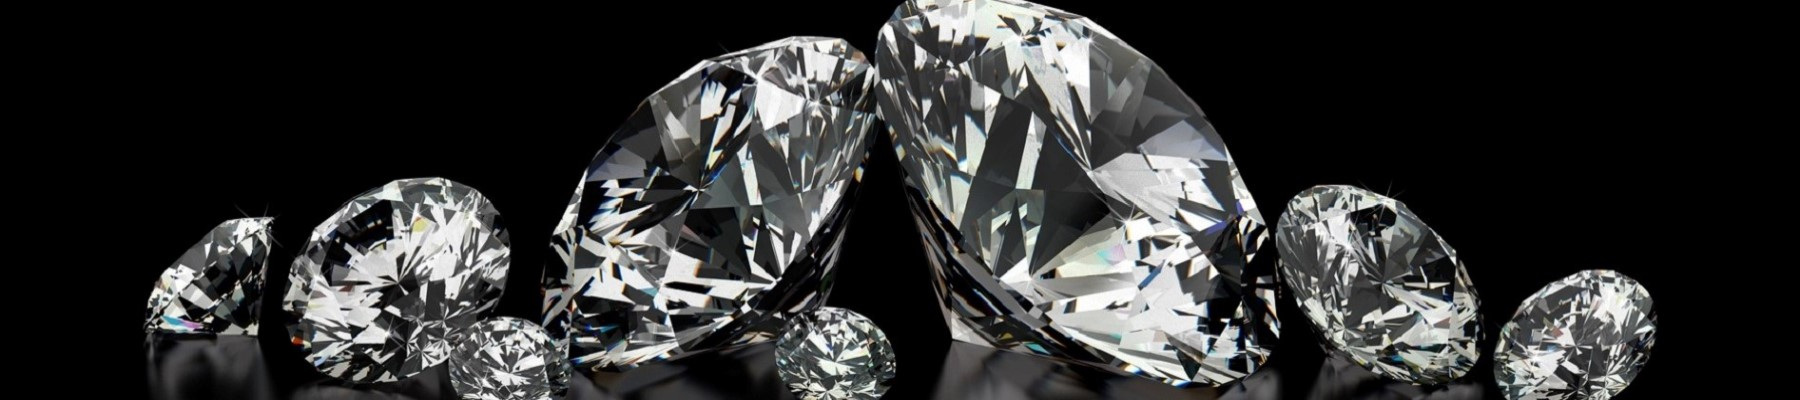

seaborn 라이브러리의 diamonds 데이터셋은 10개의 칼럼, 약 54000개의 행을 가지고 있습니다.


### 칼럼 설명
* **price**: The price of the diamond in US dollars ($326--$18,823).
<br>가격: 다이아몬드의 가격 (달러로 326--18,823).
<br>

* **carat**: The weight of the diamond (0.2--5.01).
<br>캐럿: 다이아몬드의 무게 (0.2--5.01).
<br>
* **cut**: The quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br>컷: 컷팅의 품질 (Fair, Good, Very Good, Premium, Ideal).
<br>
* **color**: Diamond color, from J (worst) to D (best).
<br>색상: 다이아몬드의 색상, J (최악)에서 D (최고)까지.
<br>
* **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br>선명도: 다이아몬드의 선명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)).
<br>
* **x**: Length in mm (0--10.74).
<br>x (길이): 밀리미터 단위의 길이 (0--10.74).
<br>
* **y**: Width in mm (0--58.9).
<br>y (너비): 밀리미터 단위의 너비 (0--58.9).
<br>
* **z**: Depth in mm (0--31.8).
<br>z (깊이): 밀리미터 단위의 깊이 (0--31.8).
<br>
* **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
<br>깊이 비율: 총 깊이 비율 = z / (x, y의 평균) = 2 * z / (x + y) (43--79).
<br>
* **table**: Width of top of diamond relative to widest point (43--95).
<br>테이블: 다이아몬드 상단의 폭이 가장 넓은 지점에 대한 상대적 폭 (43--95).
<br>


https://www.kaggle.com/datasets/shivam2503/diamonds
더 자세한 내용은 위 링크에서 확인할 수 있습니다.

## 데이터셋 다운로드

In [1]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 데이터 살펴보기
데이터의 **칼럼별 자료형**을 살펴보세요!

In [10]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

## 가설 수립
데이터셋을 살펴보고, 다음의 자료형에 맞는 적절한 칼럼 조합을 하나씩 말해주세요.
<br>ex) carat - cut

* 수치형 - 수치형: depth - table
* 범주형 - 수치형: clarity - price
* 범주형 - 범주형: cut - clarity

## 가설 검정
4번에서 찾은 조합을 가지고, 데이터셋을 살펴보고 적절한 가설을 세운 후 검정 후 평가해봅시다.

### 수치형 - 수치형

depth - table

* 귀무가설: 다이아몬드의 깊이 비율과 윗면의 너비 간 선형 상관관계가 존재하지 않는다.
* 대립가설: 다이아몬드의 깊이 비율과 윗면의 너비 간 선형 상관관계가 존재한다.

#### 시각화

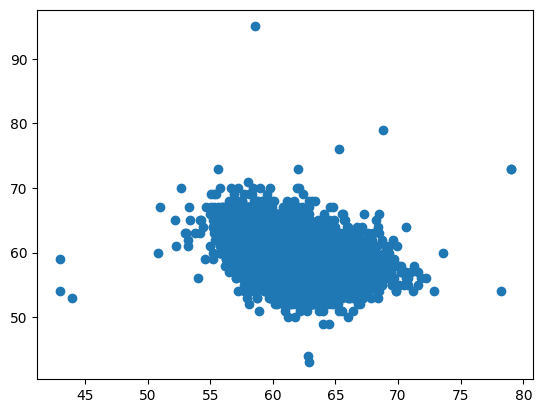

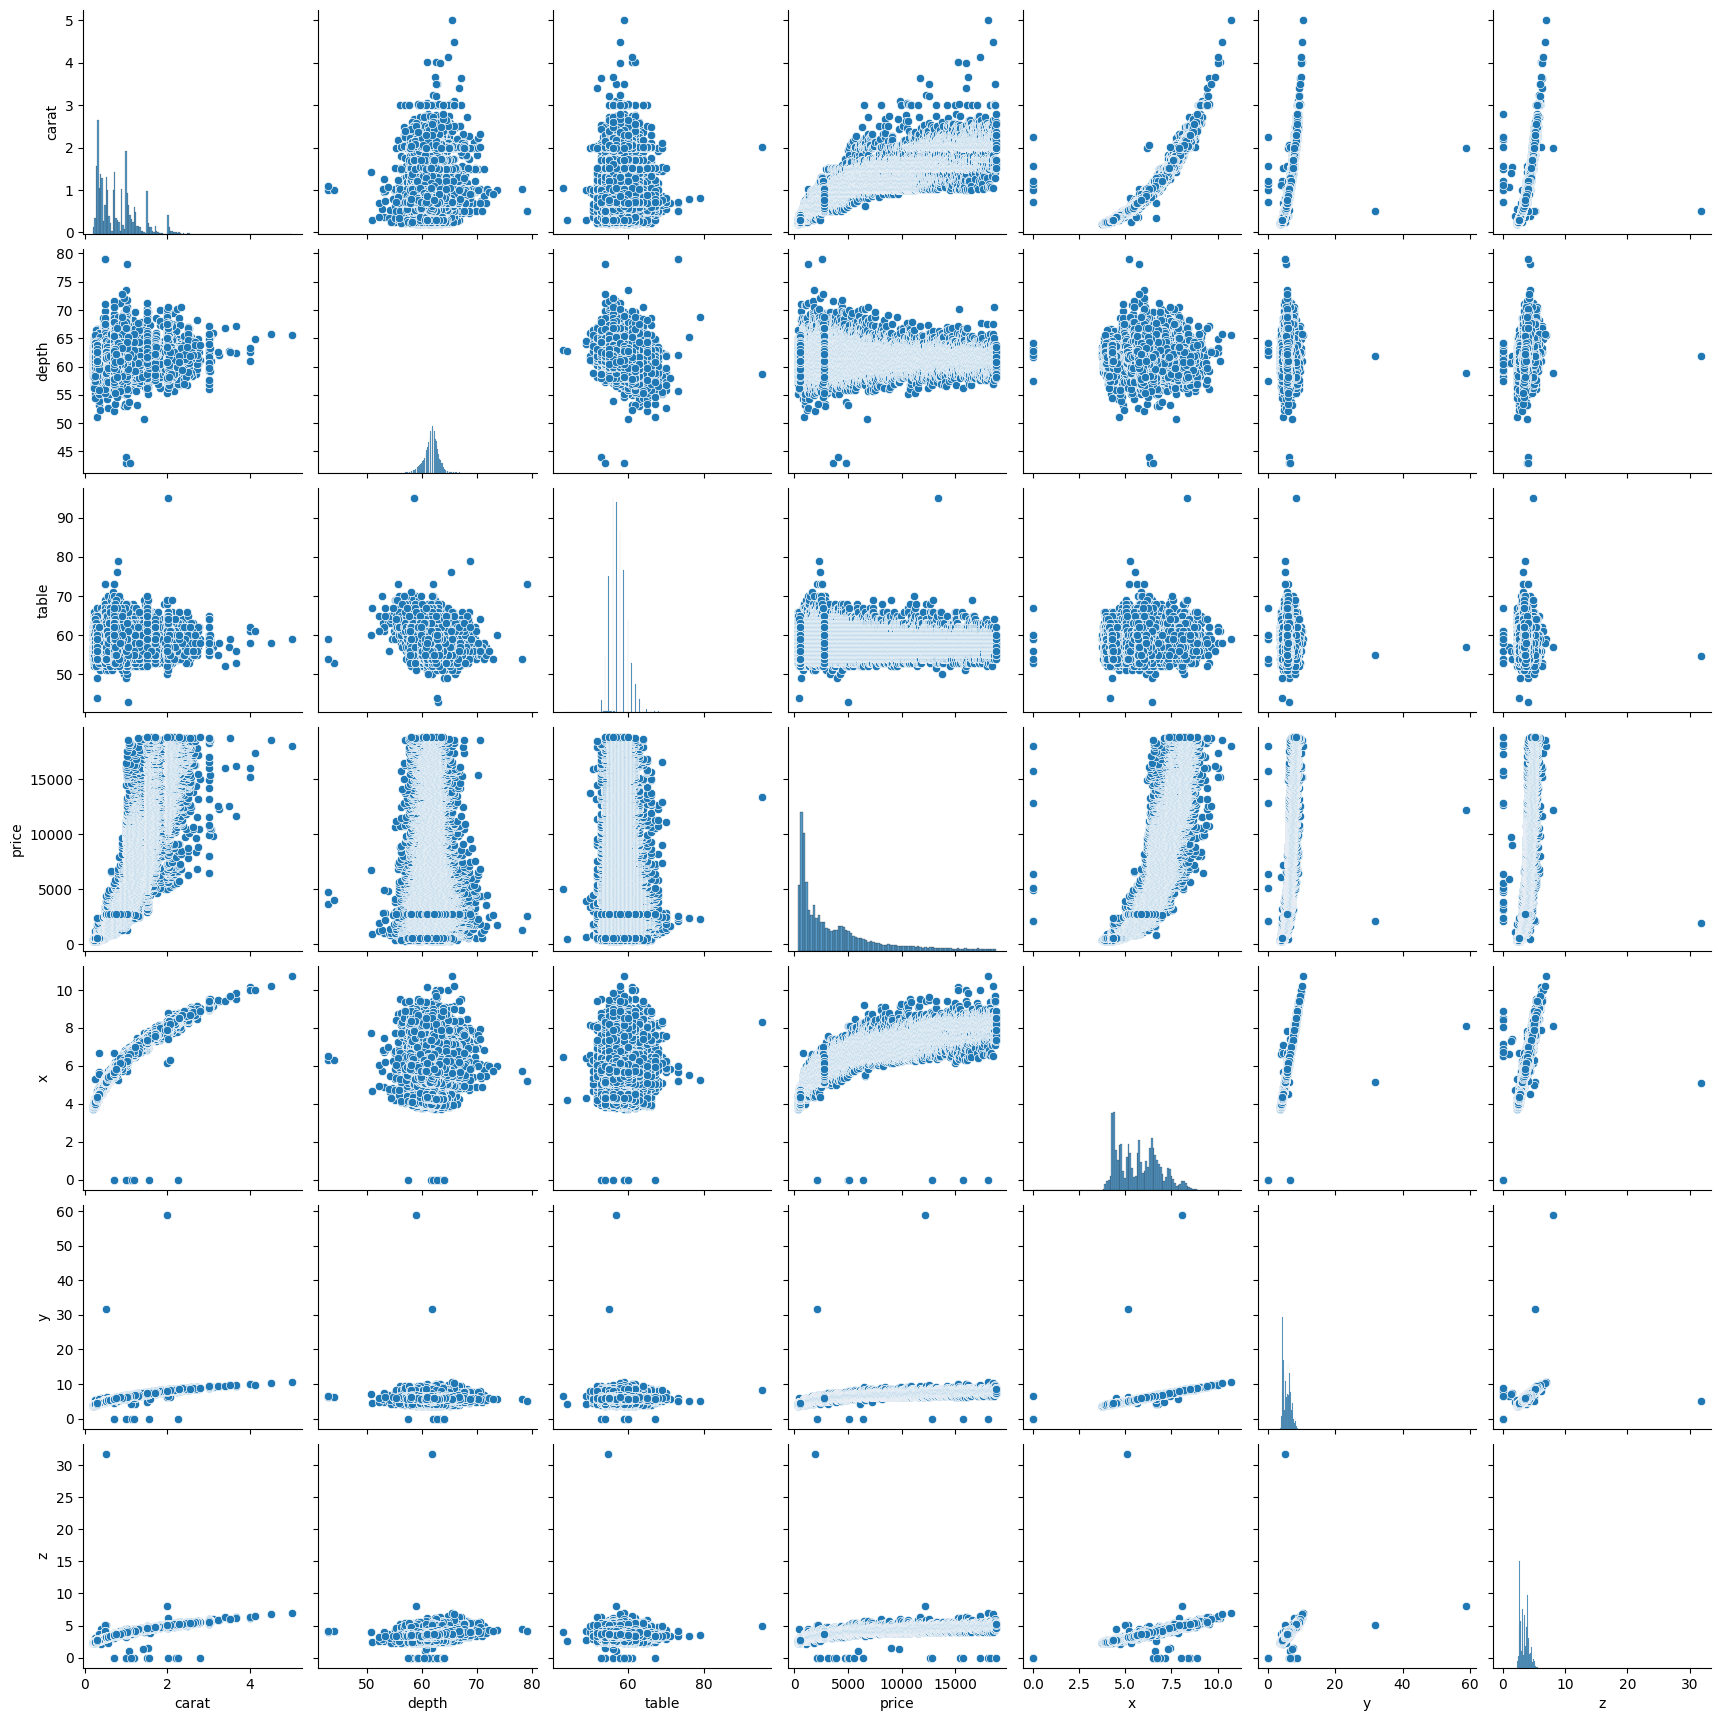

In [7]:
# 시각화 코드를 작성해주세요
import matplotlib.pyplot as plt

plt.scatter(diamonds['depth'], diamonds['table'])
sns.pairplot(diamonds)

#### 수치화

In [13]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import scipy.stats as spst
spst.pearsonr(diamonds['depth'], diamonds['table'])

PearsonRResult(statistic=np.float64(-0.29577852152658235), pvalue=np.float64(0.0))

- 상관계수의 절댓값이 0.3보다 작으므로 두 변수 간 상관관계가 약하다는 것을 파악할 수 있다.
- 또한 p value가 0이므로 0.05보다 작아 두 변수의 상관관계는 통계적으로 유의미하다.

> 결론: 
다이아몬드의 깊이 비율과 윗면의 너비 간 약한 음의 선형 상관관계가 존재한다.

### 범주형 - 수치형

clarity - price
* 귀무가설: 다이아몬드의 투명도 별 가격은 차이가 없다.
* 대립가설: 다이아몬드의 투명도 별 가격은 차이가 있다.

#### 시각화

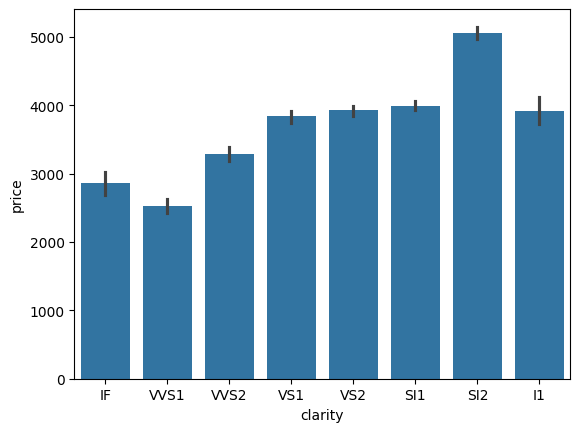

In [14]:
# 시각화 코드를 작성해주세요
sns.barplot(x='clarity', y='price', data=diamonds)
plt.show()

#### 수치화

In [21]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.6 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.6 MB 10.2 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.6 MB 14.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.6 MB 17.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.6 MB 18.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.4/9.6 MB 20.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.7/9.6 MB 20.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.0/9.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.6 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 21.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/232.9 kB ? eta -:--:--
   --------------------------------------- 232.9/232.9 kB 13.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# 전체 그룹
IF = diamonds.loc[diamonds['clarity'] == 'IF', 'price']
VVS1 = diamonds.loc[diamonds['clarity'] == 'VVS1', 'price']
VVS2 = diamonds.loc[diamonds['clarity'] == 'VVS2', 'price']
VS1 = diamonds.loc[diamonds['clarity'] == 'VS1', 'price']
VS2 = diamonds.loc[diamonds['clarity'] == 'VS2', 'price']
SI1 = diamonds.loc[diamonds['clarity'] == 'SI1', 'price']
SI2 = diamonds.loc[diamonds['clarity'] == 'SI2', 'price']
I1 = diamonds.loc[diamonds['clarity'] == 'I1', 'price']

print(spst.f_oneway(IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1))

# 시각화 결과를 참고하여 IF, I1을 제외한 그룹
VVS1 = diamonds.loc[diamonds['clarity'] == 'VVS1', 'price']
VVS2 = diamonds.loc[diamonds['clarity'] == 'VVS2', 'price']
VS1 = diamonds.loc[diamonds['clarity'] == 'VS1', 'price']
VS2 = diamonds.loc[diamonds['clarity'] == 'VS2', 'price']
SI1 = diamonds.loc[diamonds['clarity'] == 'SI1', 'price']
SI2 = diamonds.loc[diamonds['clarity'] == 'SI2', 'price']

print(spst.f_oneway(VVS1, VVS2, VS1, VS2, SI1, SI2))


# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# # Tukey HSD 사후검정 수행
# tukey = pairwise_tukeyhsd(endog=diamonds['price'], groups=diamonds['clarity'], alpha=0.05)
# print(tukey)

F_onewayResult(statistic=np.float64(215.01926041020084), pvalue=np.float64(1.9190895e-316))
F_onewayResult(statistic=np.float64(271.7412025248919), pvalue=np.float64(7.964592695095684e-288))


### 1. 전체 그룹
- F값이 2~3 이상이므로 차이가 있고, 약 215로 그룹 간 차이가 크다. 
- p value가 0.05보다 훨씬 작으므로 통계적으로 유의미하다.


### 2. IF, I1을 제외한 그룹
- F값이 2~3 이상이므로 차이가 있고, 약 272로 그룹 간 차이가 1의 차이보다 크다. 
- p value가 0.05보다 훨씬 작으므로 통계적으로 유의미하다.
- 시각화 결과 IF, I1을 제외하고 분석하면 차이가 훨씬 두드러질 것으로 예상하였다. 
  - F값이 1에 비해 커진 것을 볼 수 있었다.
  - p값은 1보다 크게 나왔지만 그 값이 이미 충분히 작으므로, 최종적으로 IF, I1을 제외한 그룹에서 투명도 별 차이가 큰 것을 알 수 있었다.



> 결론: 
다이아몬드의 투명도 별 가격은 차이가 있으며, 최하위/최상위 투명도인 IF/I1을 제외한 그룹에서 그 차이가 더 두드러진다.

### 범주형 - 범주형

cut - clarity
* 귀무가설: 다이아몬드 커팅 품질과 투명도는 연관이 없다.
* 대립가설: 다이아몬드 커팅 품질과 투명도는 연관이 있다.

#### 시각화

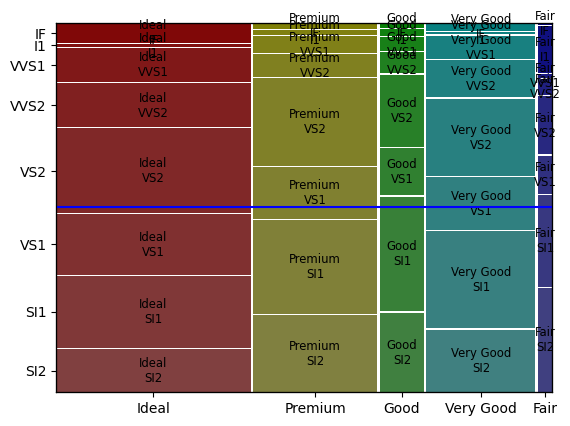

In [30]:
# 시각화 코드를 작성해주세요
from statsmodels.graphics.mosaicplot import mosaic

mosaic(diamonds, ['cut','clarity'])
plt.axhline(0.5, color = 'blue')

#### 수치화

In [27]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import pandas as pd
table = pd.crosstab(diamonds['cut'], diamonds['clarity'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=np.float64(4391.398067200363), pvalue=np.float64(0.0), dof=28, expected_freq=array([[ 715.17037449, 1460.30598813, 2024.05202076, 3264.61292176,
        4897.51868743, 5219.94466073, 3673.33878383,  296.05656285],
       [ 457.65461624,  934.48470523, 1295.23926585, 2089.1038376 ,
        3134.03926585, 3340.36735261, 2350.65728587,  189.45367075],
       [ 400.94141639,  818.68205413, 1134.73140527, 1830.21916945,
        2745.6647386 , 2926.4243604 , 2059.36054876,  165.97630701],
       [ 162.80571005,  332.43288839,  460.76744531,  743.17623285,
        1114.90077864, 1188.29977753,  836.22106044,   67.39610679],
       [  53.42788283,  109.09436411,  151.20986281,  243.88783834,
         365.87652948,  389.96384872,  274.4223211 ,   22.11735261]]))

1. 자유도 = (8-1)*(5-1) = 28
2. 카이제곱 통계량: 약 4391
- 카이제곱 통계량이 자유도의 두 배인 56을 넘으므로 다이아몬드의 커팅 품질과 투명도는 연관이 있다.
- p value가 0으로 0.05보다 작으므로 통계적으로 유의미하다.

> 결론:
카이제곱 통계량이 4391으로 매우 크므로, 다이아몬드 커팅 품질과 투명도는 강한 연관성을 가지고 있으며, 통계적으로 유의미하다.

고생 많으셨어요:) 회귀 세션도 화이팅!